In [1]:
%cd ..

/Users/crupley/gal/hoodie


In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import cPickle as pickle

from code.clusterize import *

In [59]:
df = pickle.load(open('featuresdf.pkl', 'rb'))
latlon = df[['lat', 'lon']]

In [42]:
%time cnum = cut2cluster('010406', 20)

CPU times: user 1min 16s, sys: 1.01 s, total: 1min 17s
Wall time: 1min 17s


In [48]:
cnum.shape

(7325,)

In [60]:
df = df.ix[cnum.index]

In [51]:
df.shape

(7325, 2)

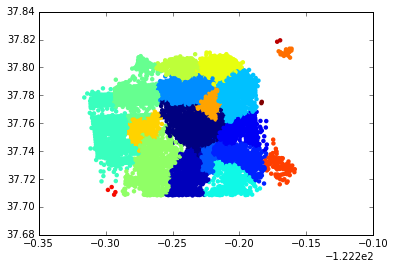

In [55]:
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)

In [56]:
%time cnum = cut2cluster('07', 20)

CPU times: user 1min 28s, sys: 1.22 s, total: 1min 29s
Wall time: 1min 29s


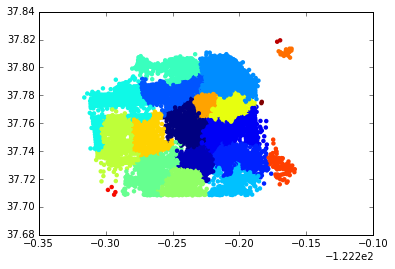

In [57]:
plt.scatter(df.lon, df.lat, c=cnum, linewidths = 0)

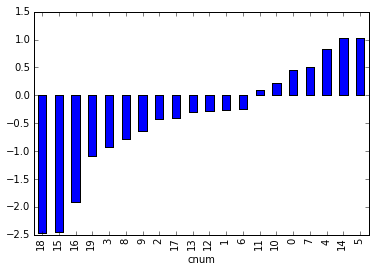

In [64]:
df['cnum'] = cnum
df.groupby('cnum').mean()['population'].sort_values().plot(kind='bar')

In [65]:
fn = 'results/CL' + '07' + '.csv'
cutdf = pd.read_csv(fn)

In [66]:
g = make_graph(cutdf)

In [71]:
featuredf = df.copy()
featuredf['cnum'] = cnum

In [ ]:
ks, wcsses = elbow_plot(cutdf, df.population)